
# **Importing Required Libraries**

---

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sweetviz as sv
import category_encoders as ce
from scipy import stats
from autoviz.AutoViz_Class import AutoViz_Class
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, KFold
import statsmodels.api as sm
from statsmodels.formula.api import ols

# **Loading the Dataset**

---

In [ ]:
IBM_HR = pd.read_csv("/content/HR_Analytics.csv")

## *Analyzing the Dataset*
To extract meaningful insights and understand the underlying patterns and characteristics of the data.

In [ ]:
IBM_HR.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [ ]:
IBM_HR.shape

(1470, 35)

In [ ]:
IBM_HR.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [ ]:
IBM_HR.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


# ***Data Cleaning***

*Identifying missing values within the dataset.*

In [ ]:
IBM_HR.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No missing values are present in the dataset

*Identifying Duplicate Values in the DataSet*

In [ ]:
IBM_HR.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1465    False
1466    False
1467    False
1468    False
1469    False
Length: 1470, dtype: bool

There are no duplicate values in the dataset.

In [ ]:
IBM_HR.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

*From the above information we can observe that EmployeeNumber has 1470 unique values which is same as the number of rows in the dataset. So, we remove this feature. We can also observe that the features EmployeeCount, Over18, StandardHours have single unique value. So we are dropping those features.All these does not contribute to the predictive power of a model.*

In [ ]:
IBM_HR.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'], axis=1, inplace=True)

*Separating Numerical and Categorical Features*

In [ ]:
numerical_features = IBM_HR.select_dtypes(exclude='object')
categorical_features = IBM_HR.select_dtypes(include='object').drop(columns='Attrition')

***Z-Test***

To identify outliers

In [ ]:
#Z-Test
scaler = StandardScaler()
numerical_features = scaler.fit_transform(numerical_features)
z_scores = stats.zscore(numerical_features)
abs_z_scores = np.abs(z_scores)
threshold = 3
outliers = (abs_z_scores > threshold).all(axis=1)
print(outliers)


[False False False ... False False False]


# **AUTO EDA**

                                             |          | [  0%]   00:00 -> (? left)


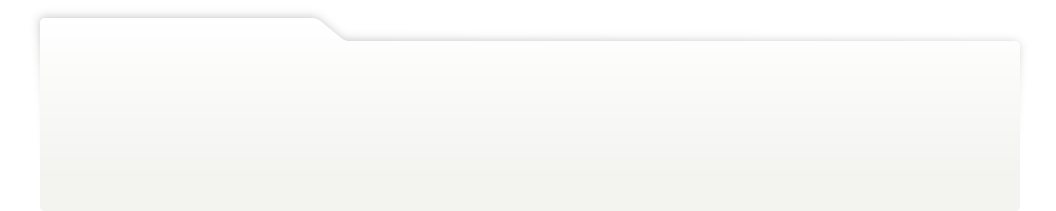
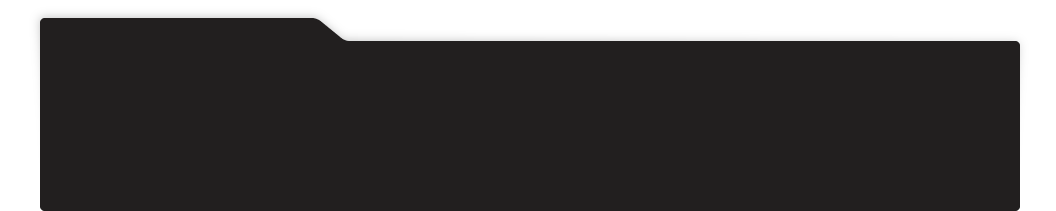
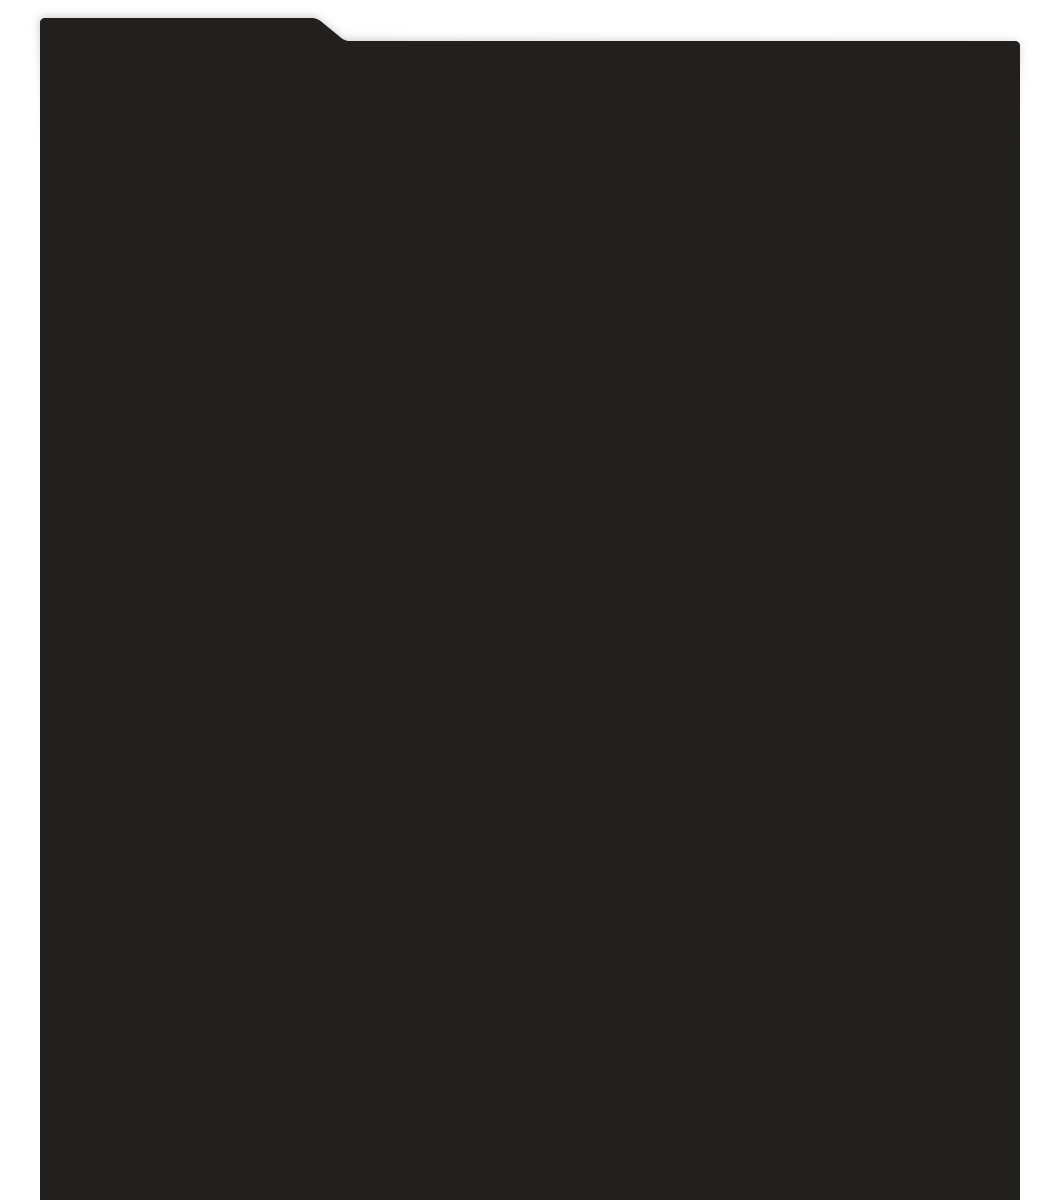
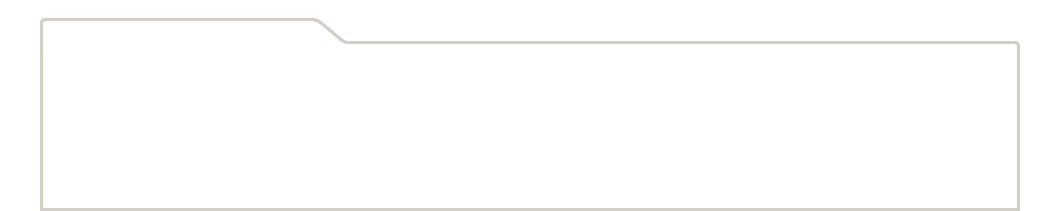
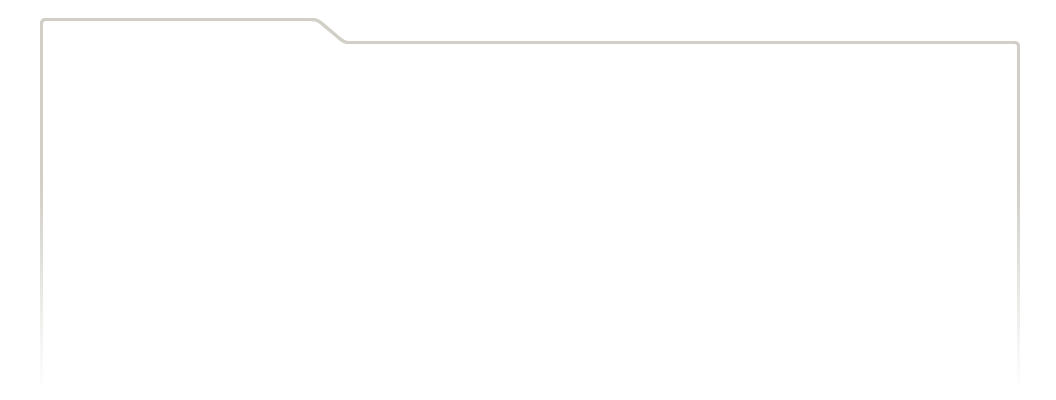
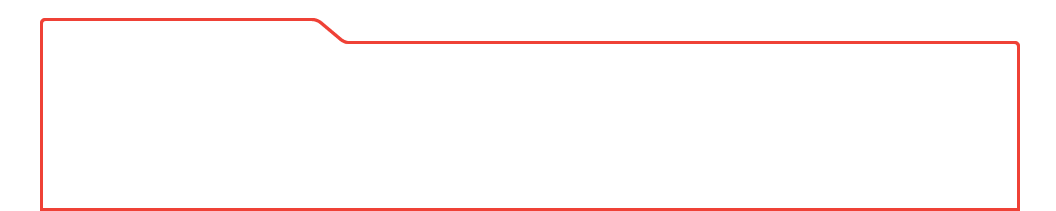
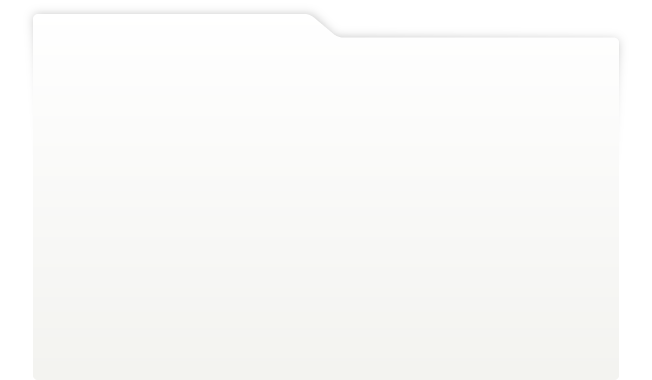
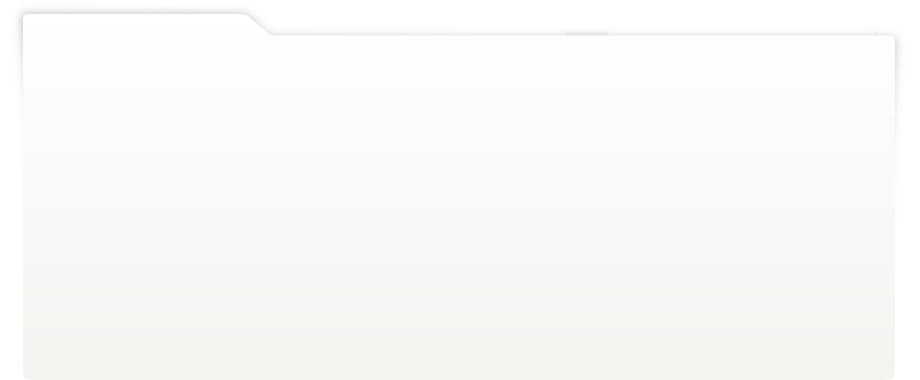
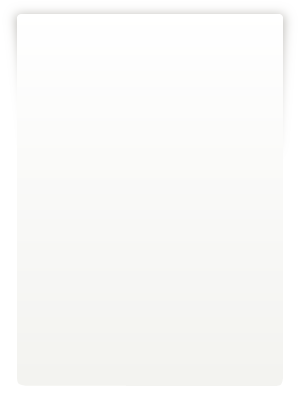
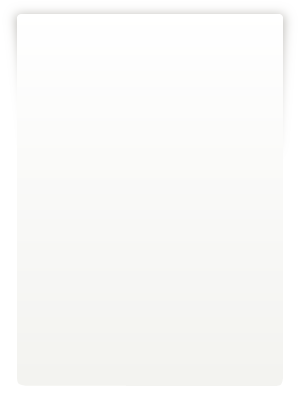
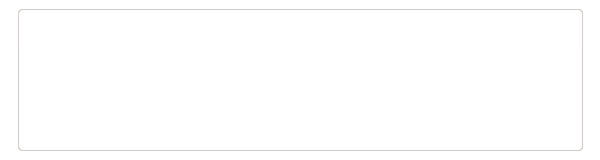
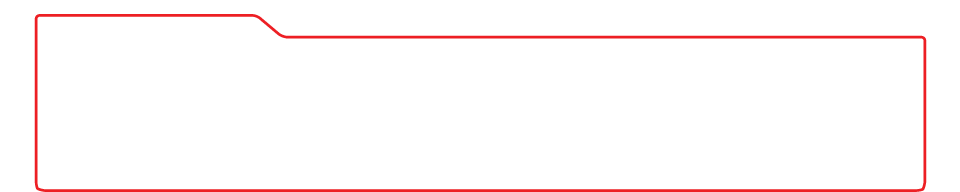
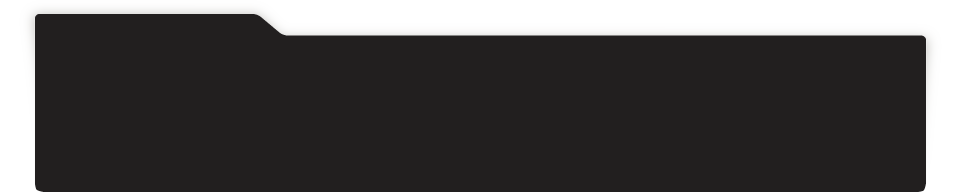
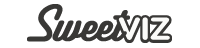
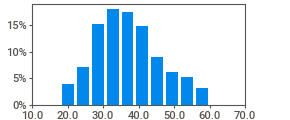
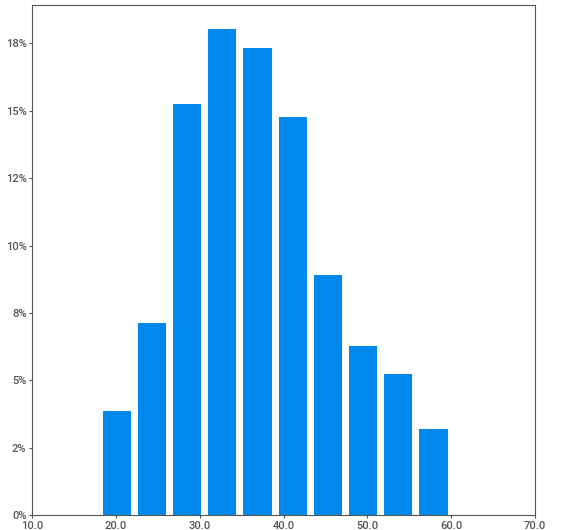
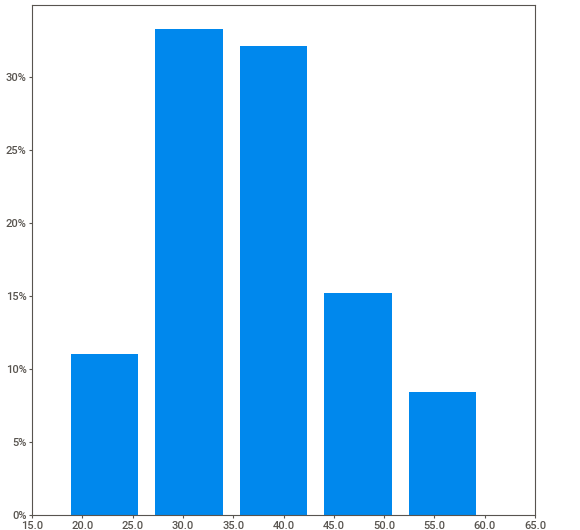
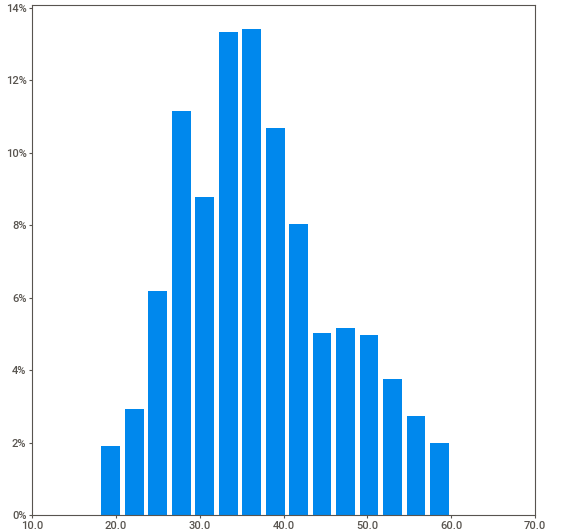
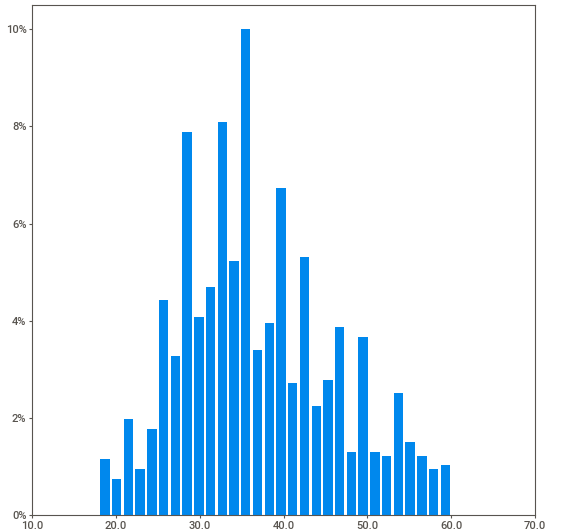
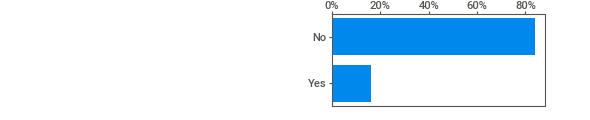
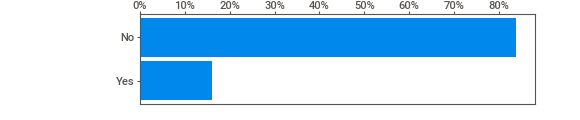
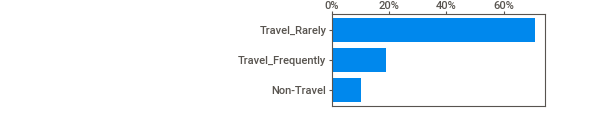
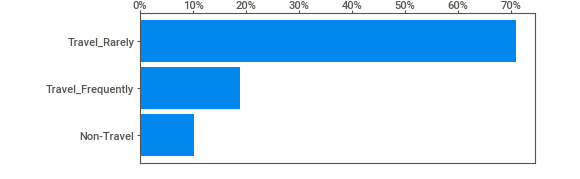
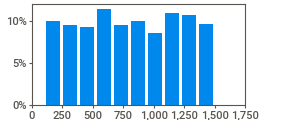
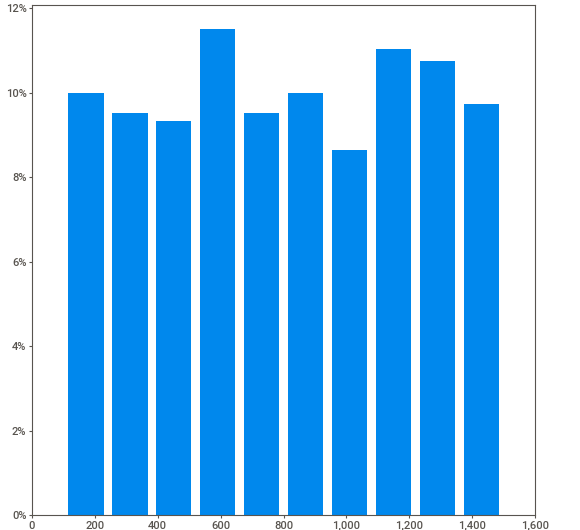
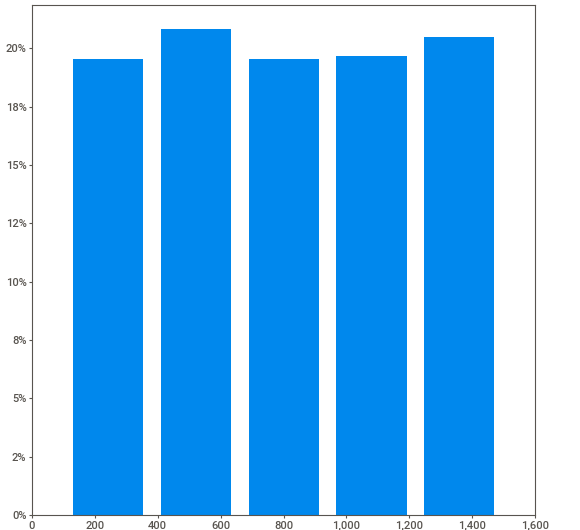
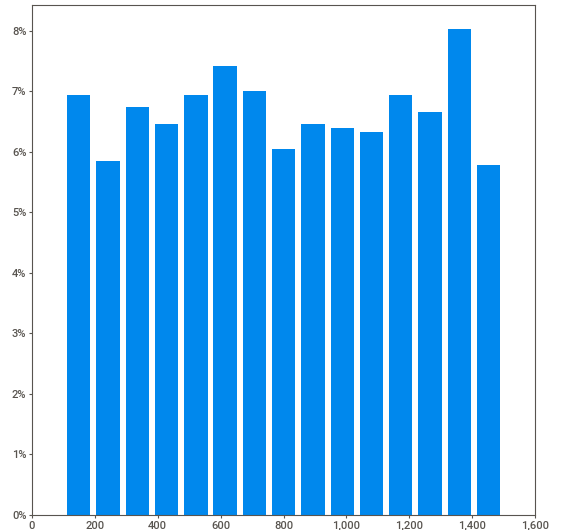
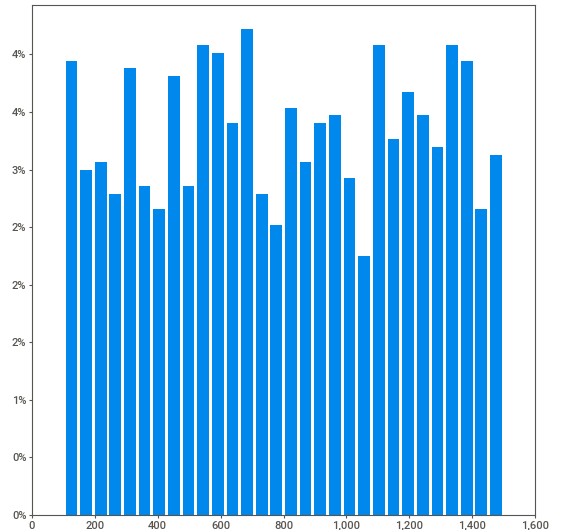
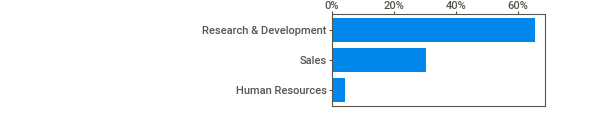
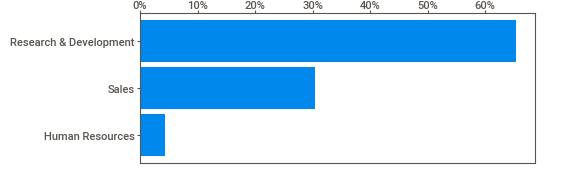
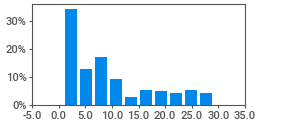
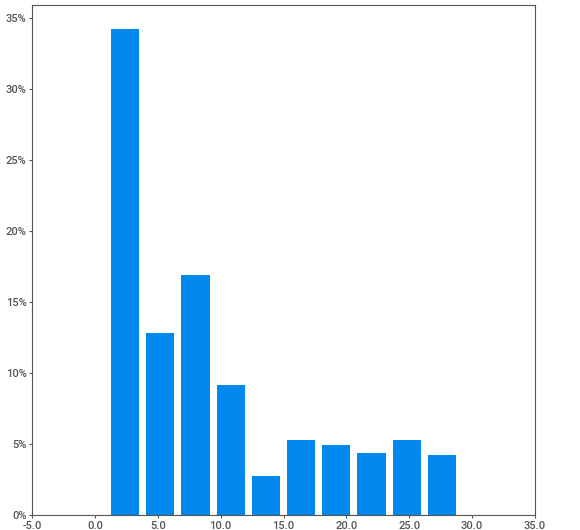
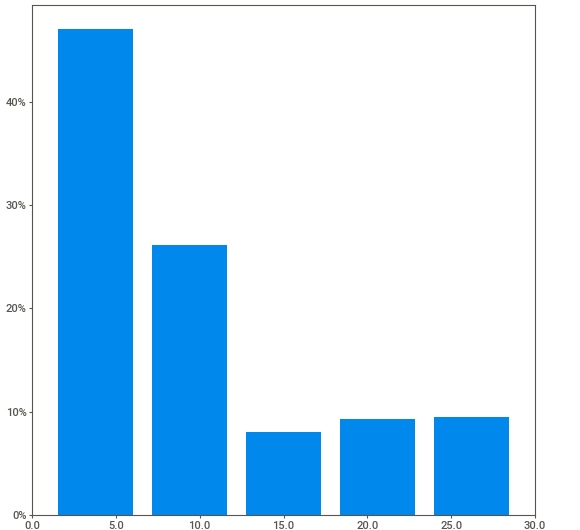
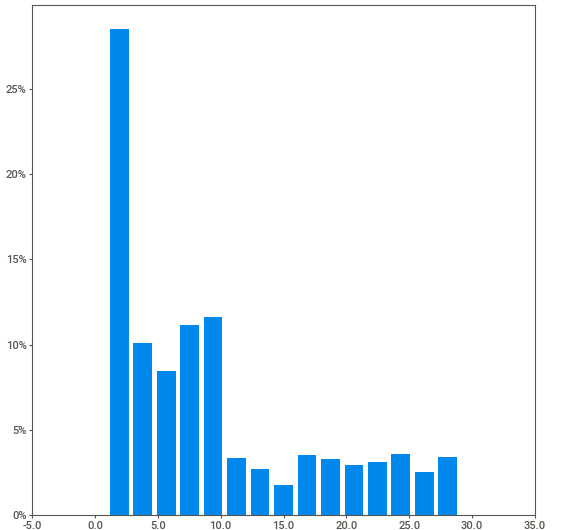
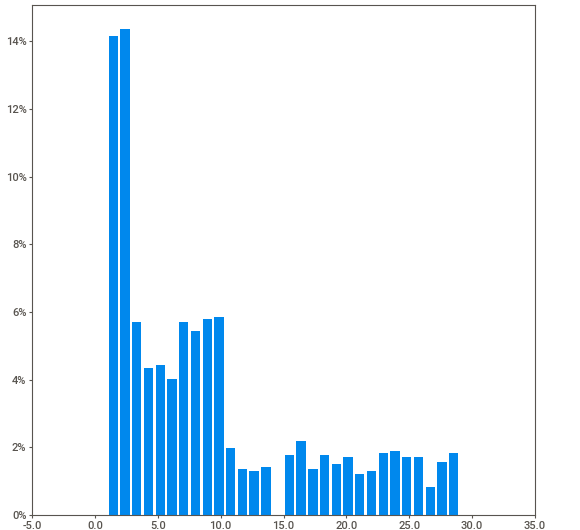
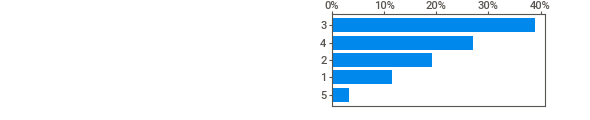
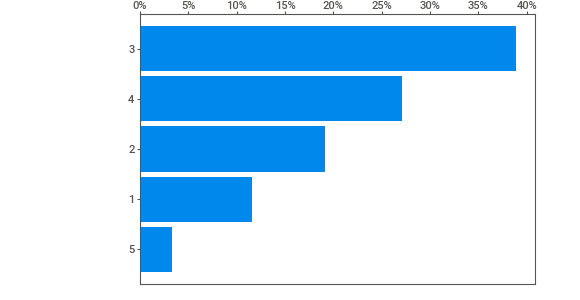
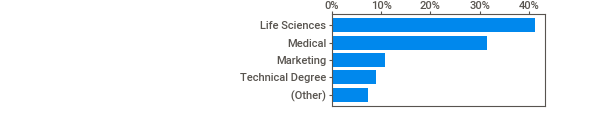
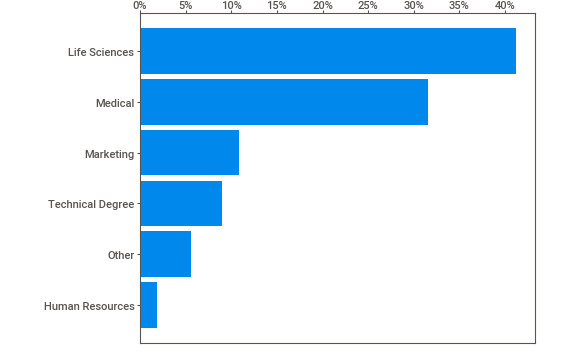
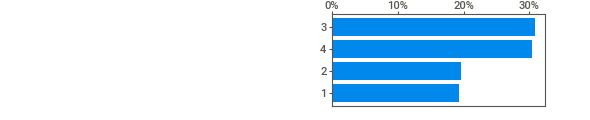
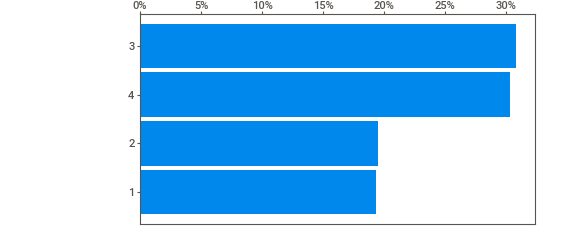
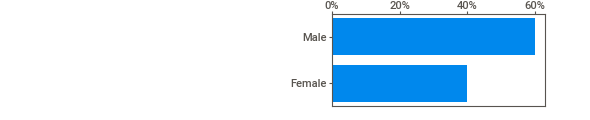
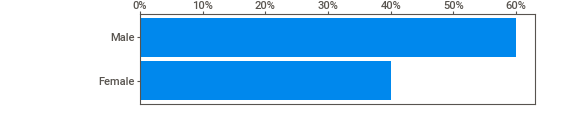
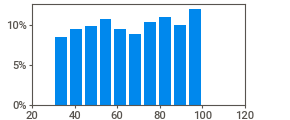
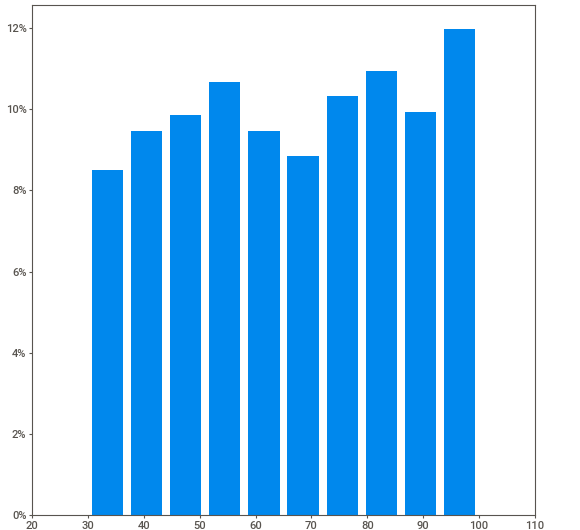
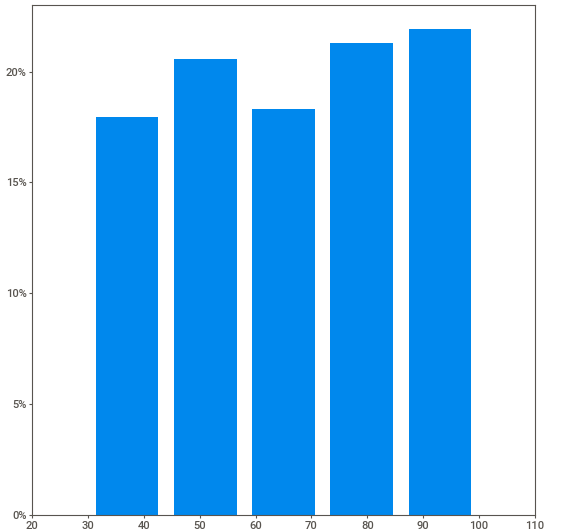
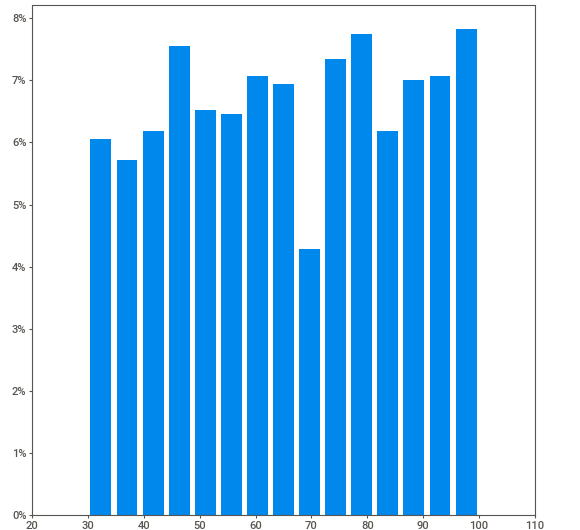
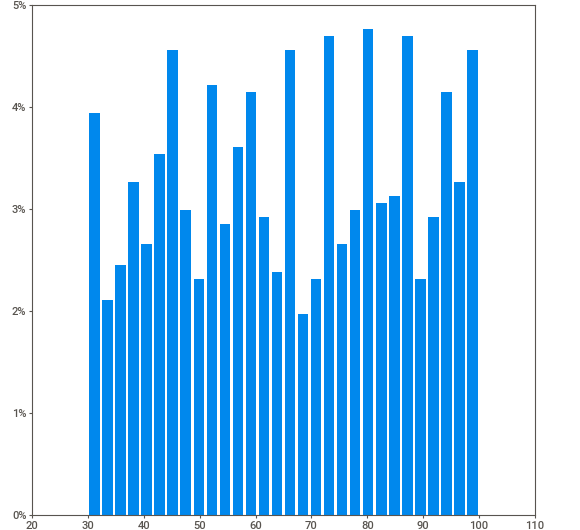
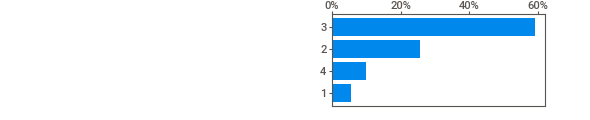
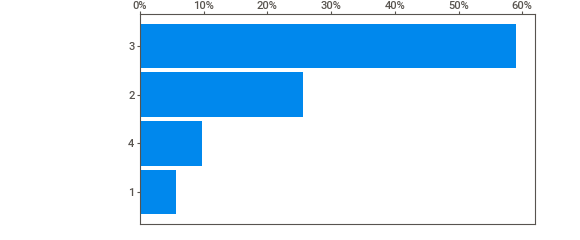
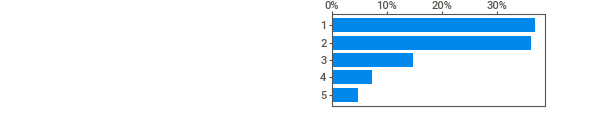
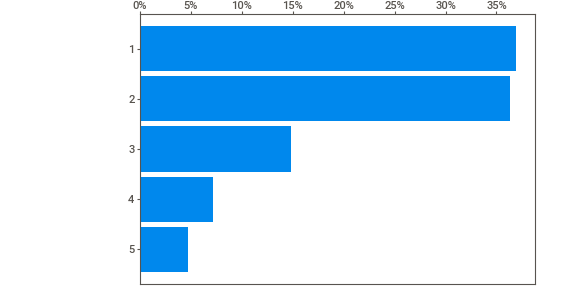
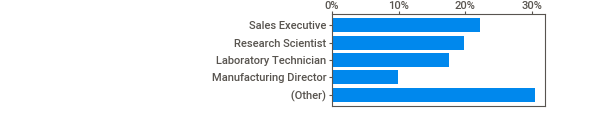
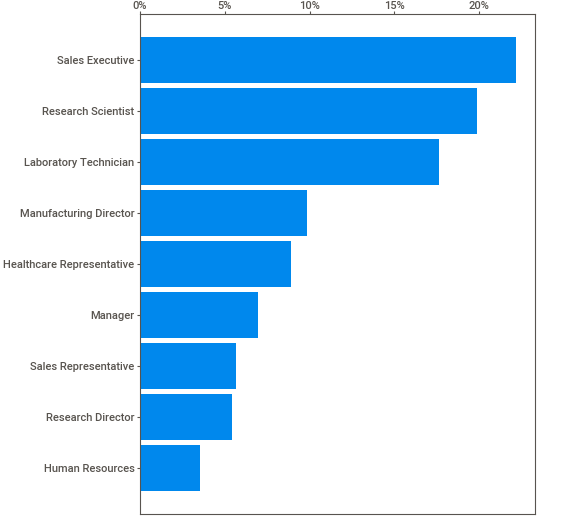
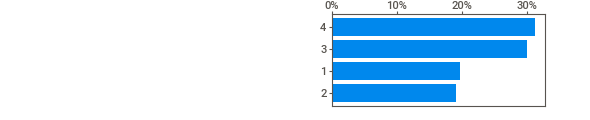
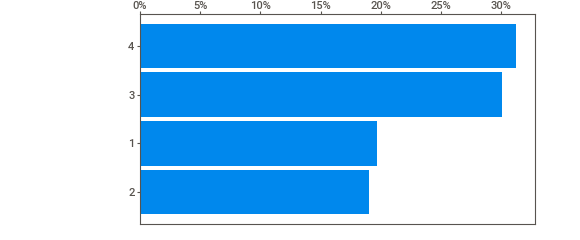
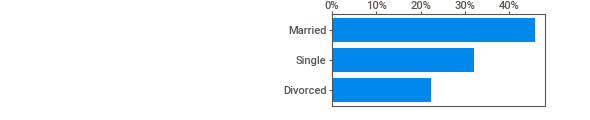
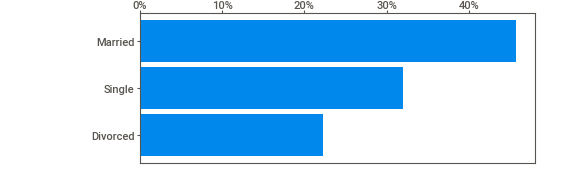
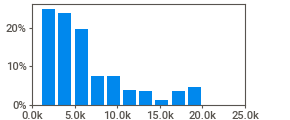
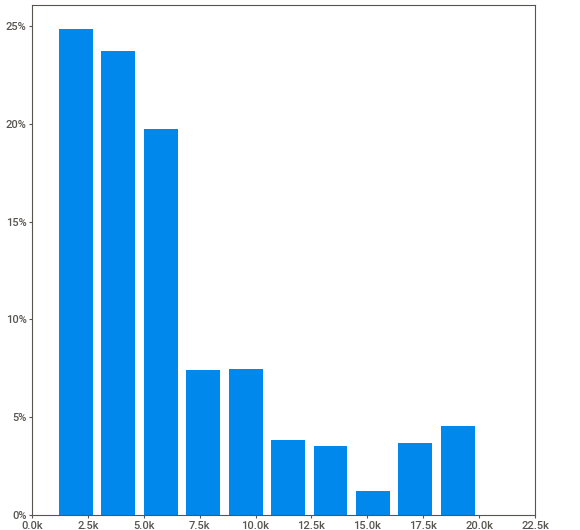
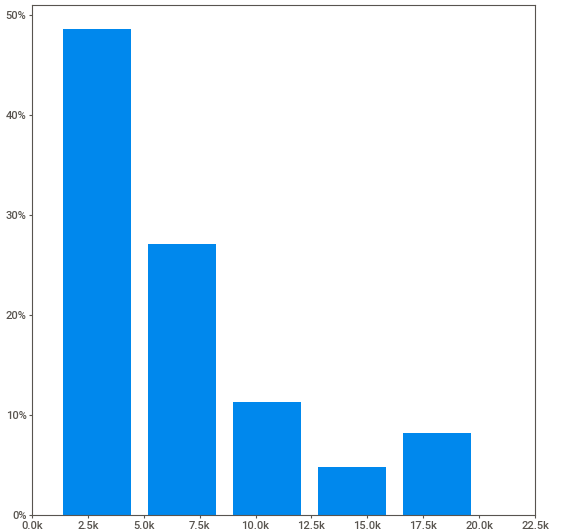
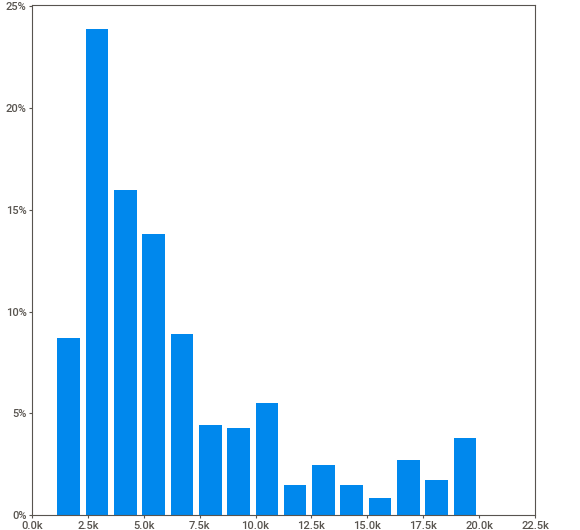
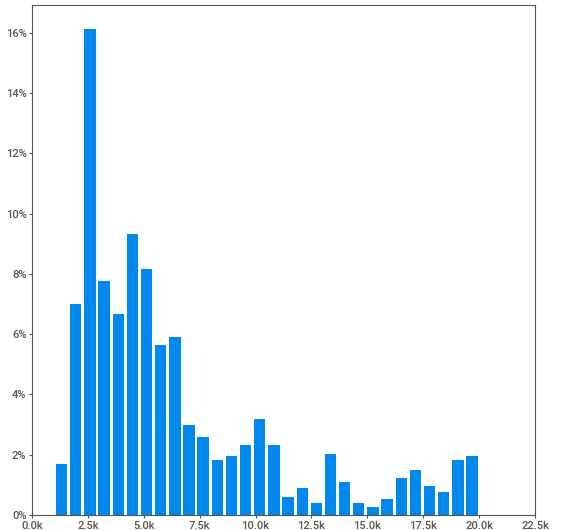
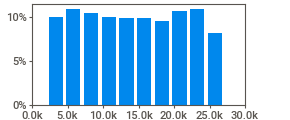
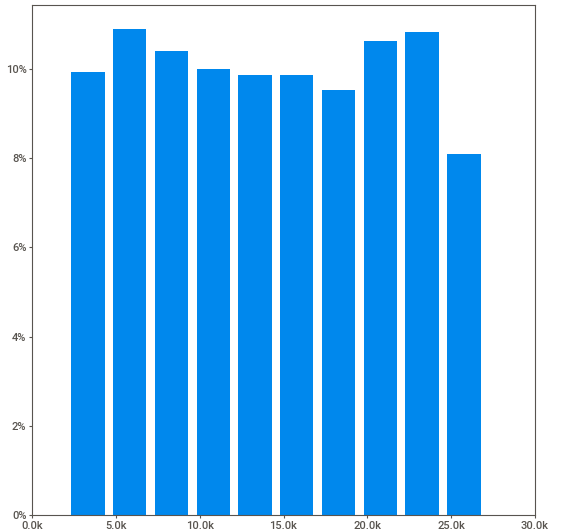
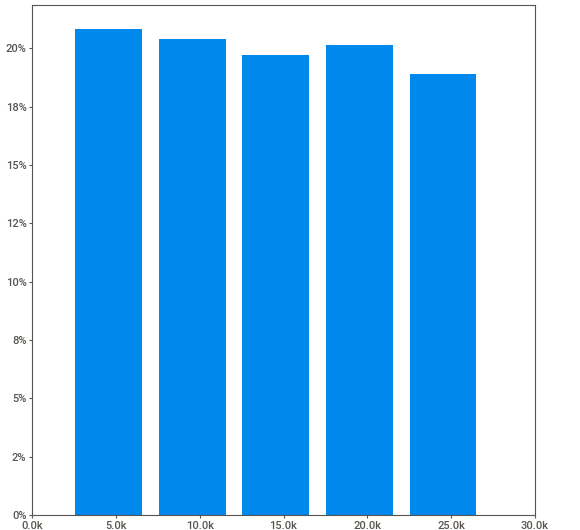
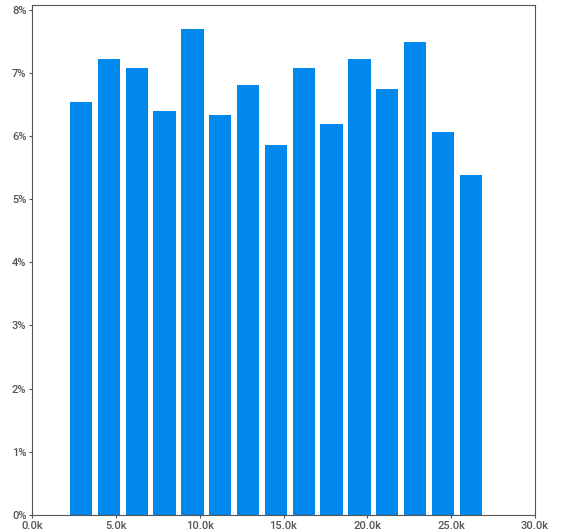
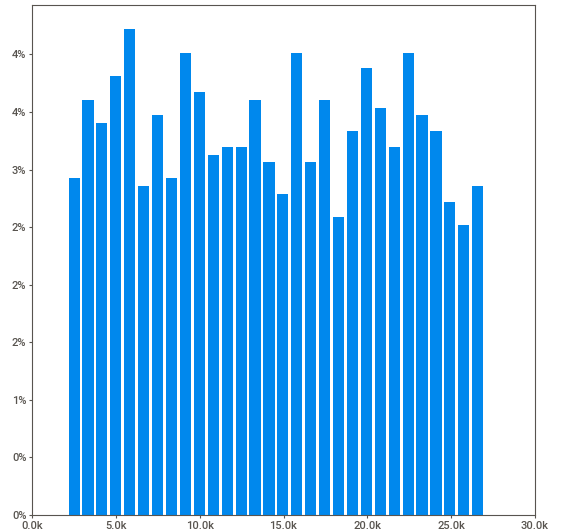
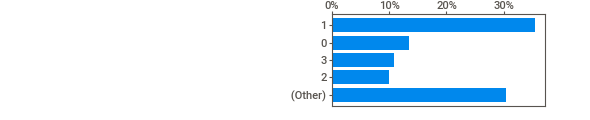
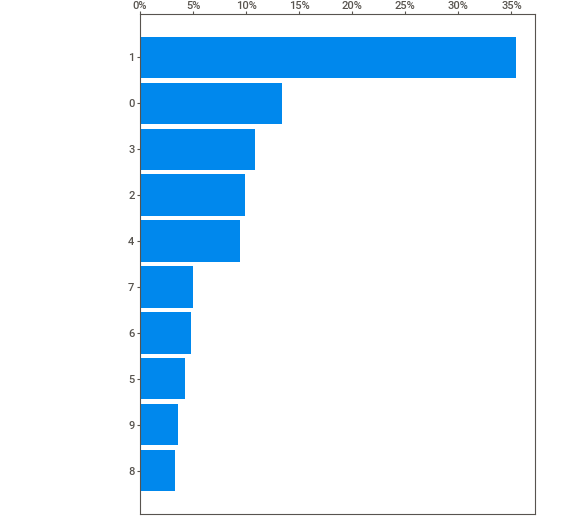
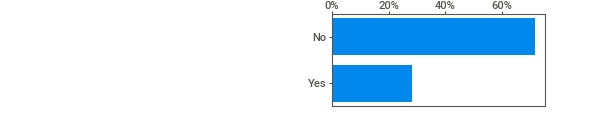
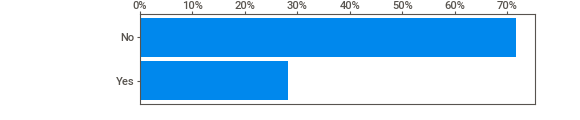
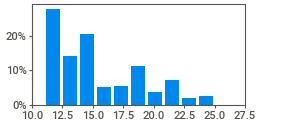
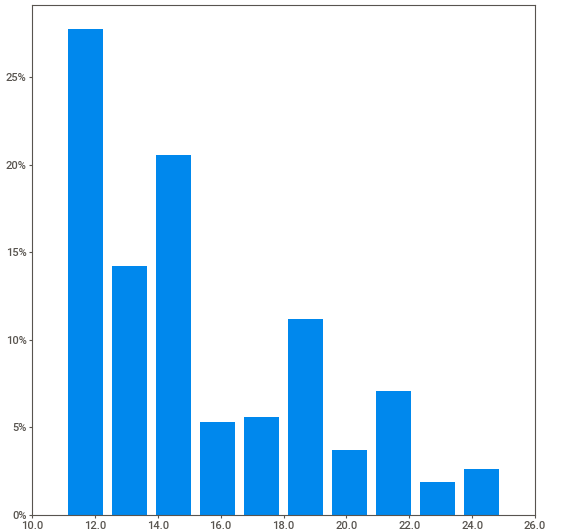
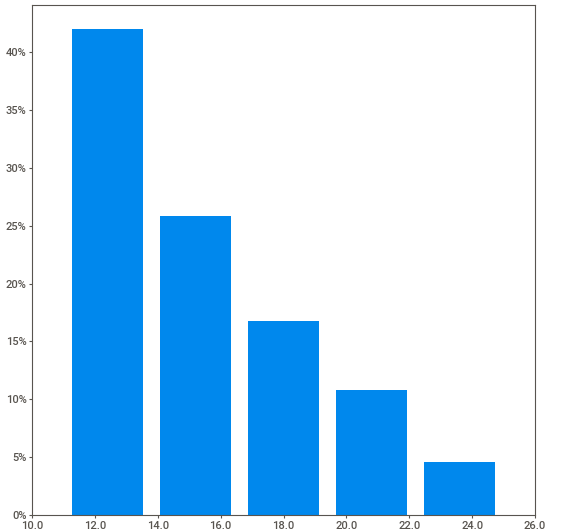
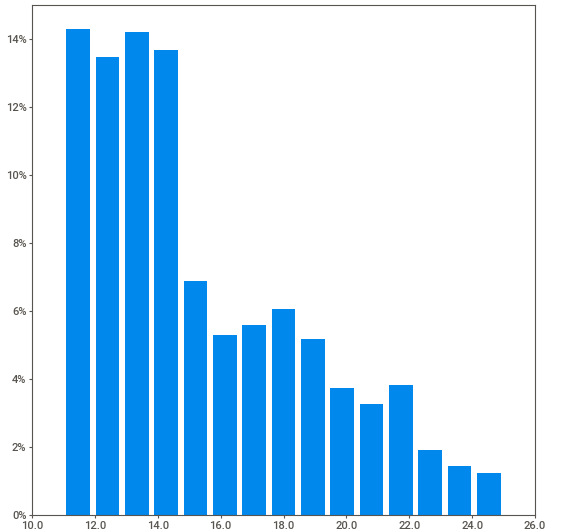
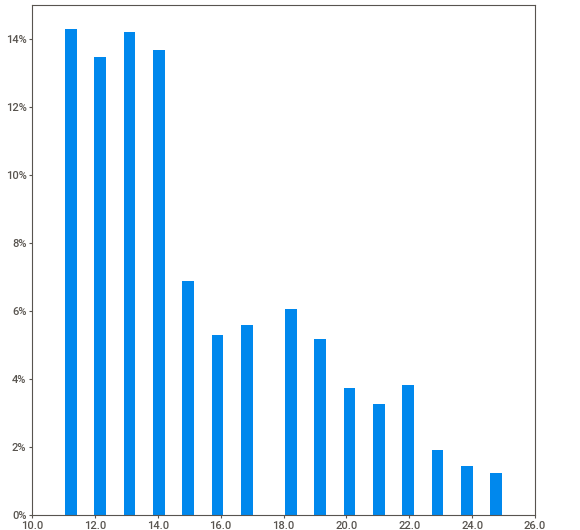
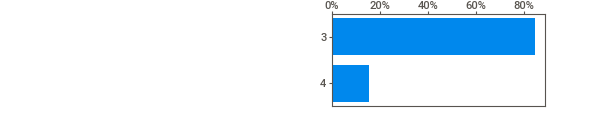
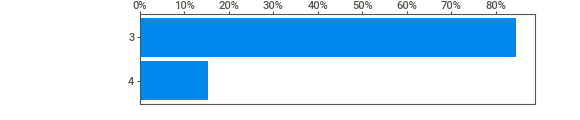
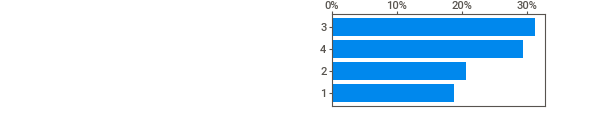
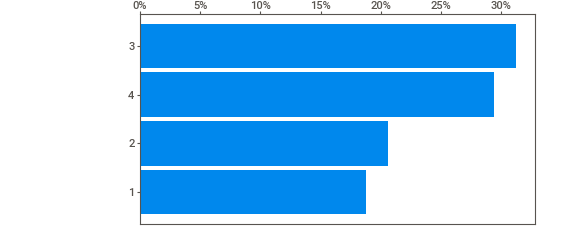
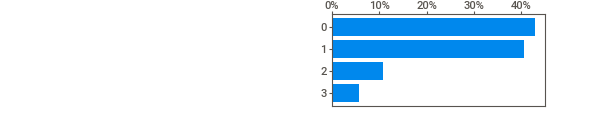
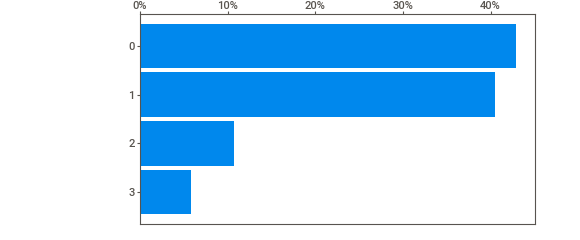
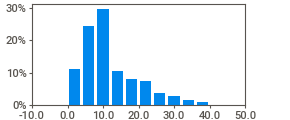
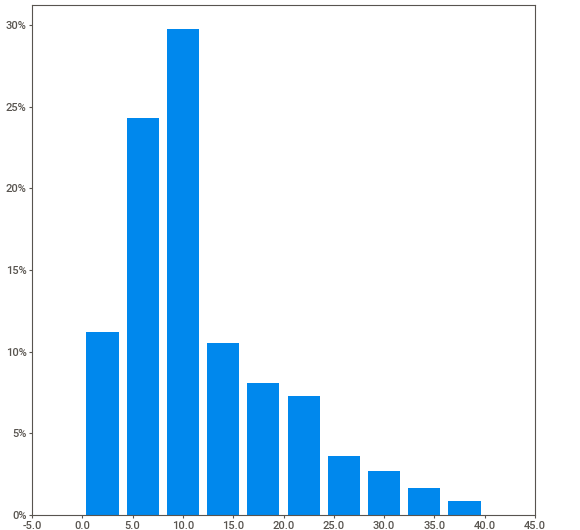
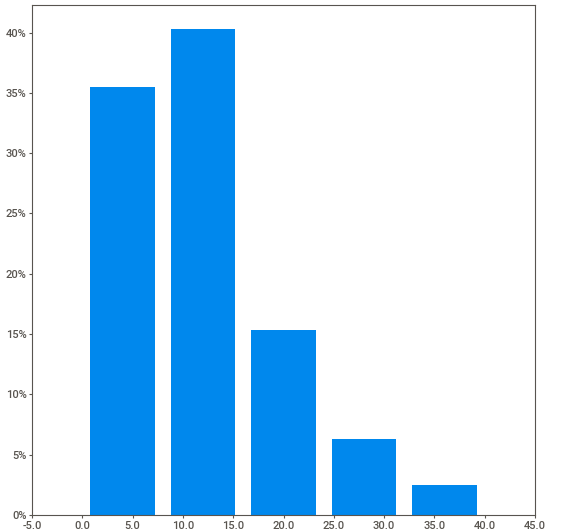
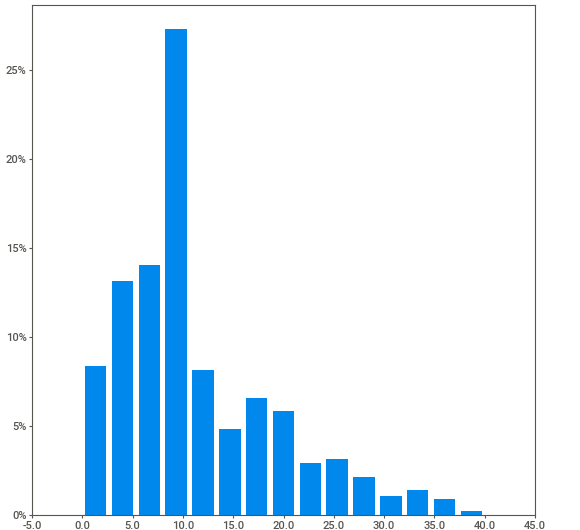
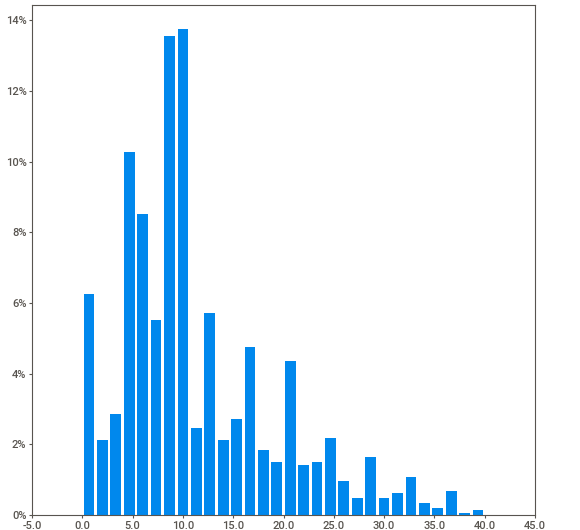
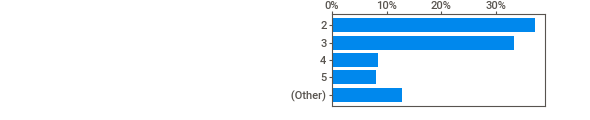
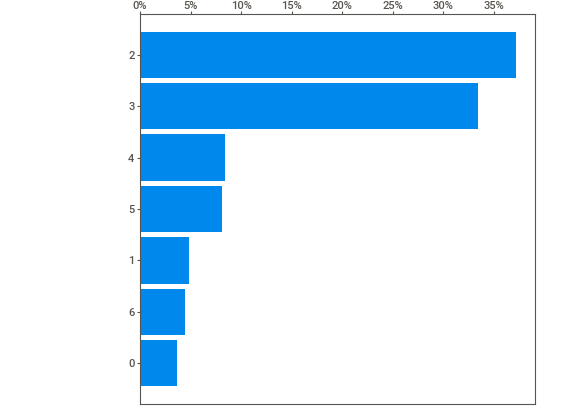
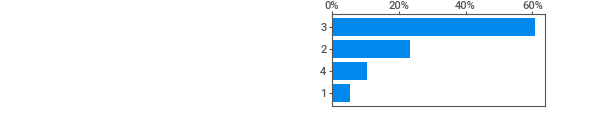
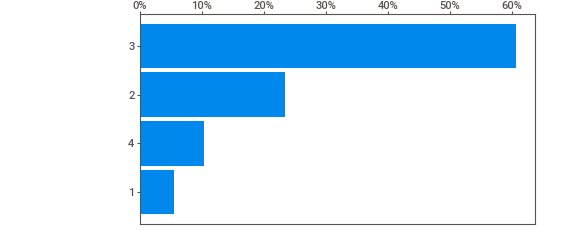
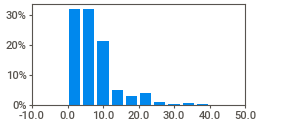
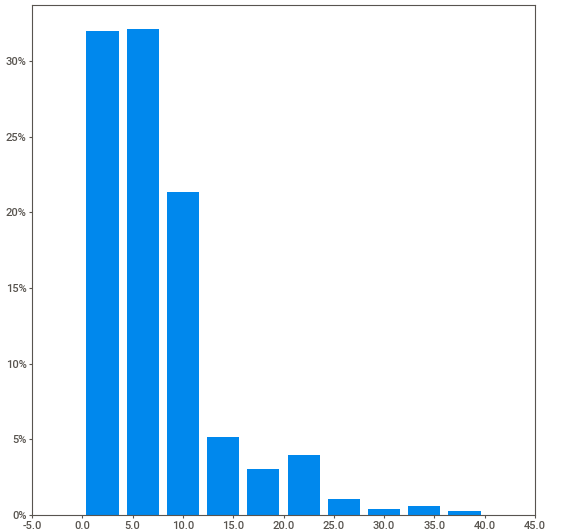
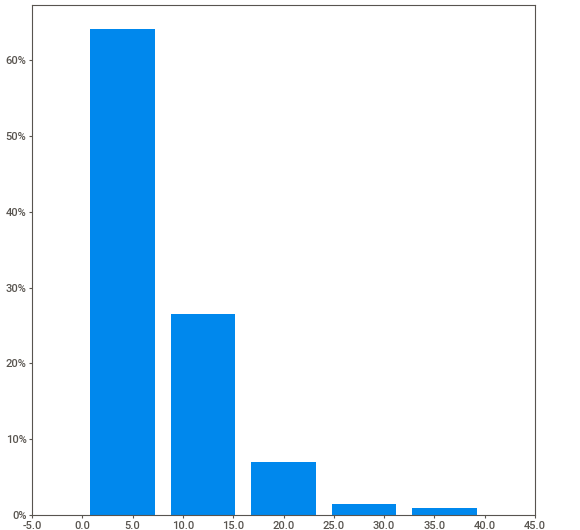
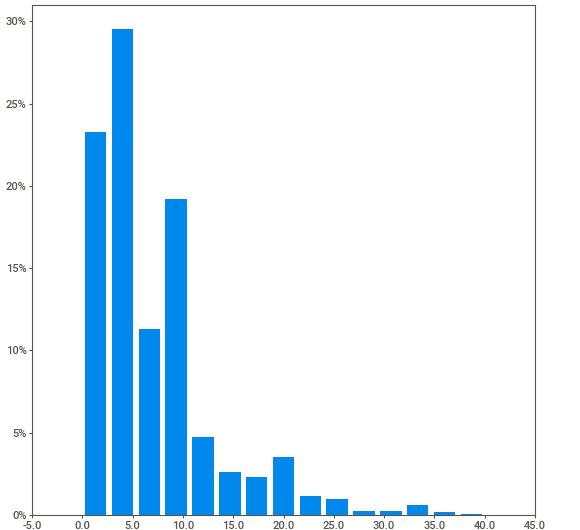
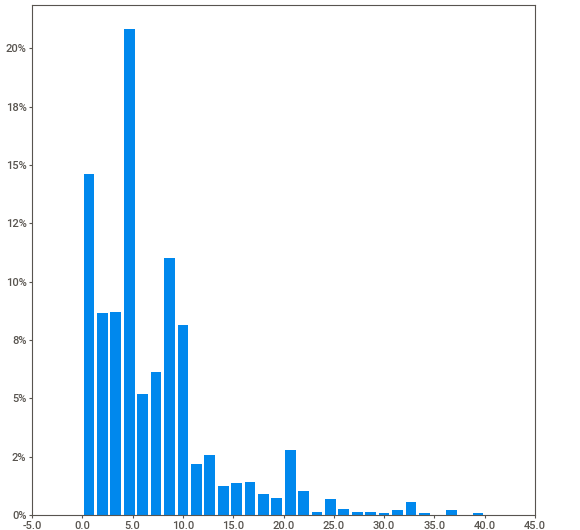
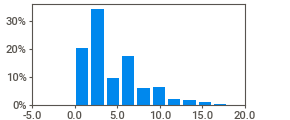
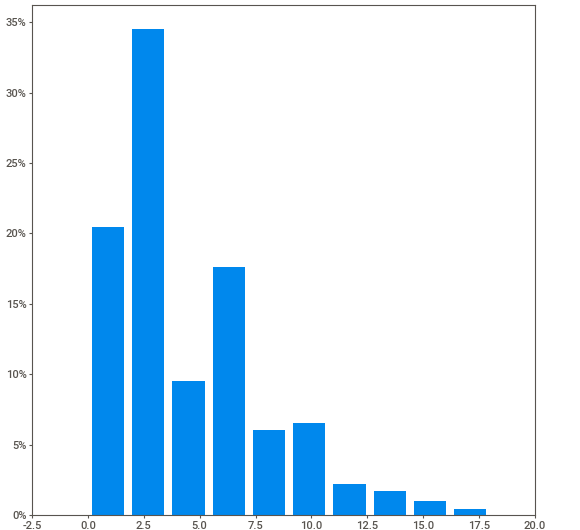
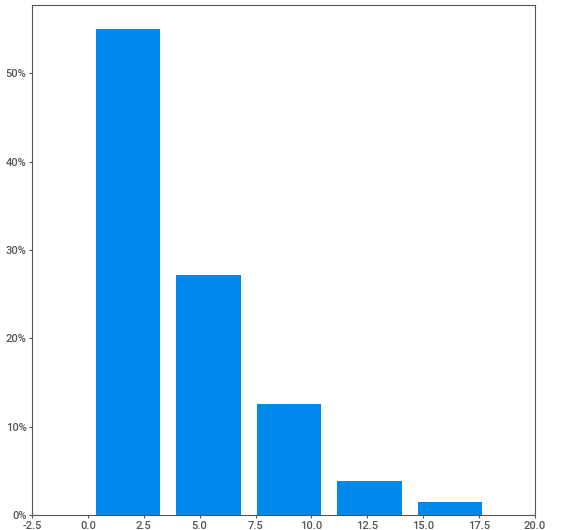
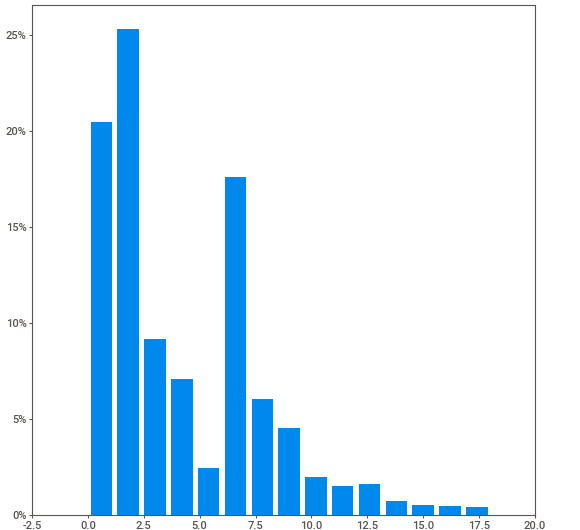
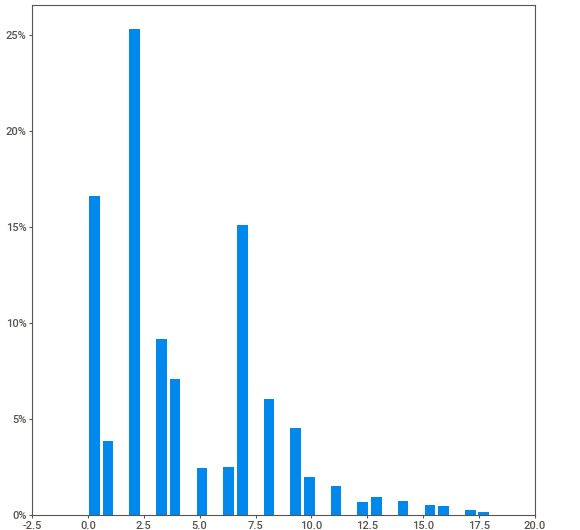
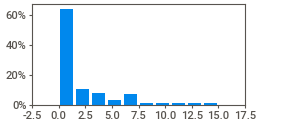
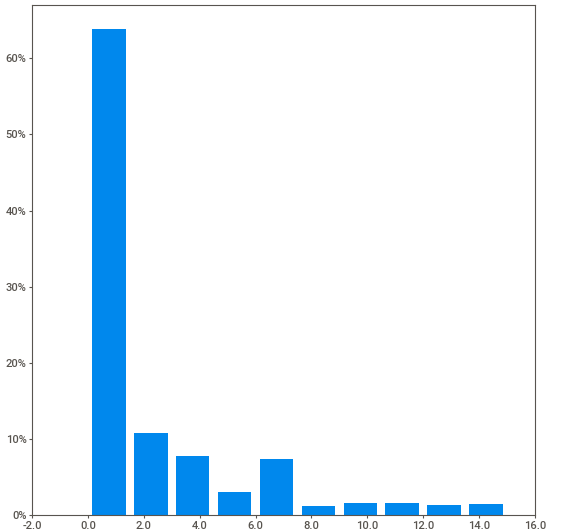
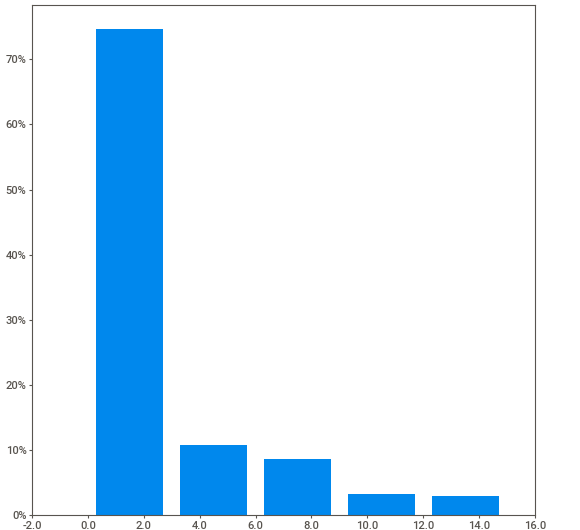
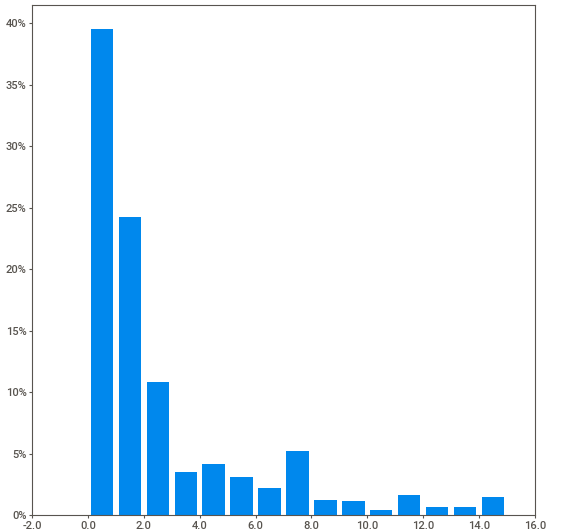
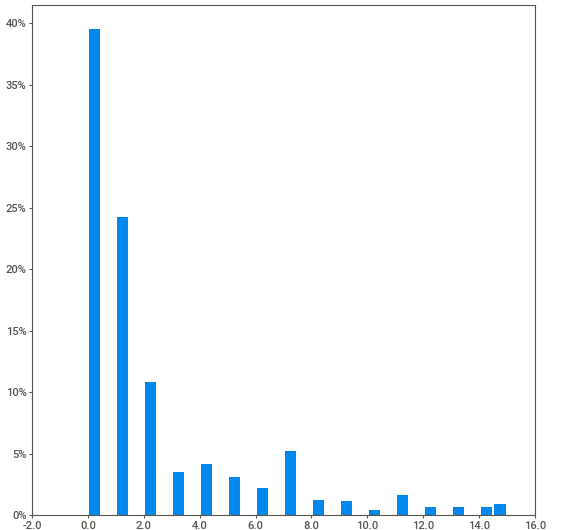
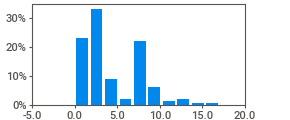
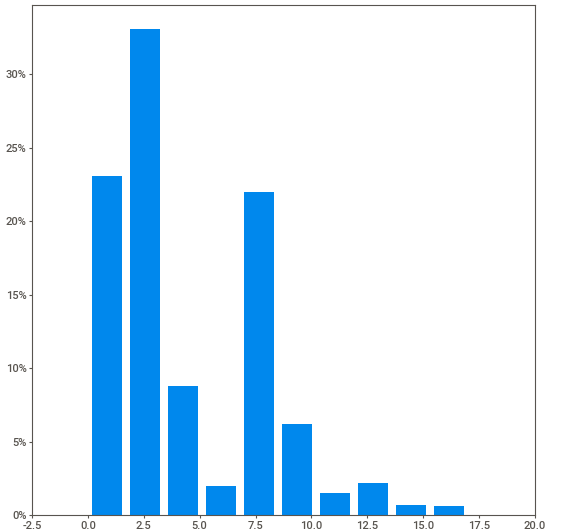
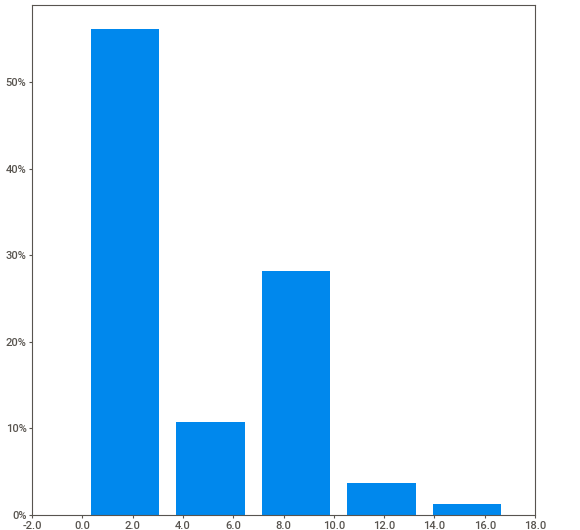
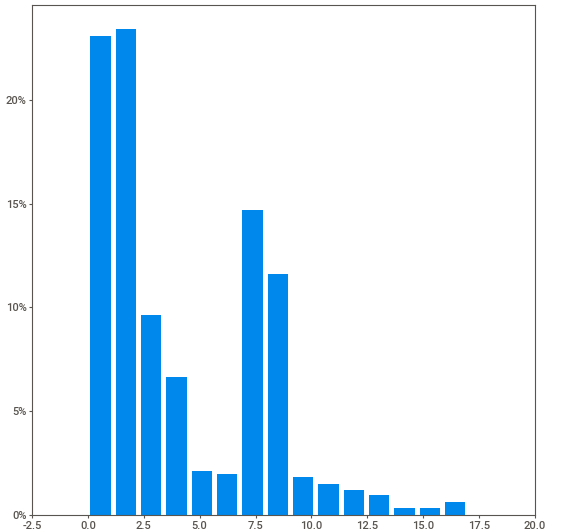
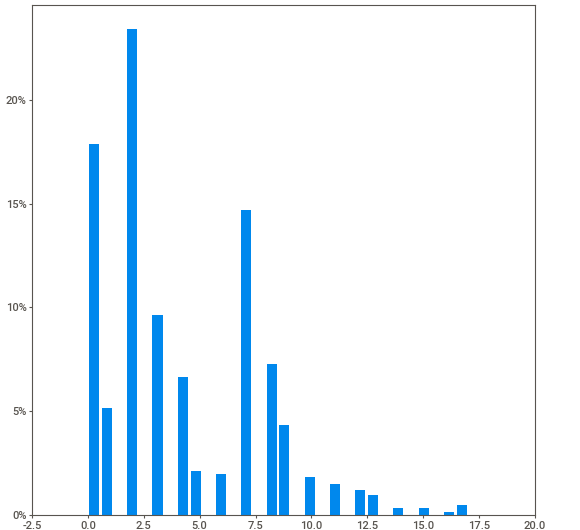
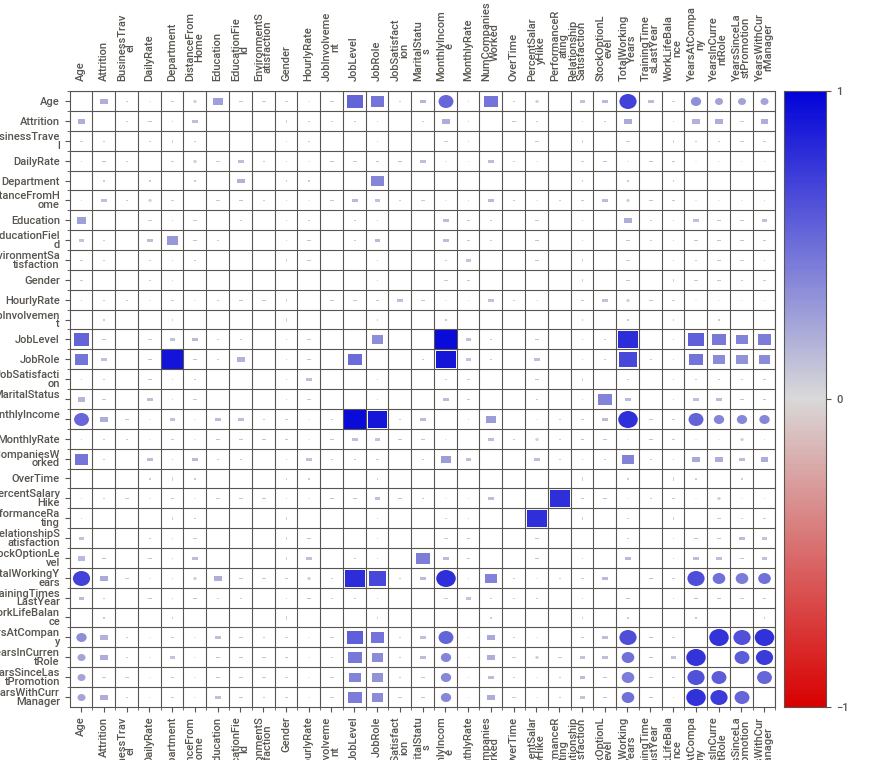
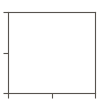

In [ ]:
analyze_report = sv.analyze(IBM_HR)
analyze_report.show_notebook()

# **AUTO VISUALIZATION**

In [ ]:
AV = AutoViz_Class()
%matplotlib inline
df_av = AV.AutoViz('/content/HR_Analytics.csv')

    pandas ascii encoder does not work for this file. Continuing...
    pandas utf-8 encoder does not work for this file. Continuing...
    pandas iso-8859-1 encoder does not work for this file. Continuing...
    pandas cp1252 encoder does not work for this file. Continuing...
    pandas latin1 encoder does not work for this file. Continuing...
Not able to read or load file. Please check your inputs and try again...


# **Feature Selection**

---

***Correlation Analysis***

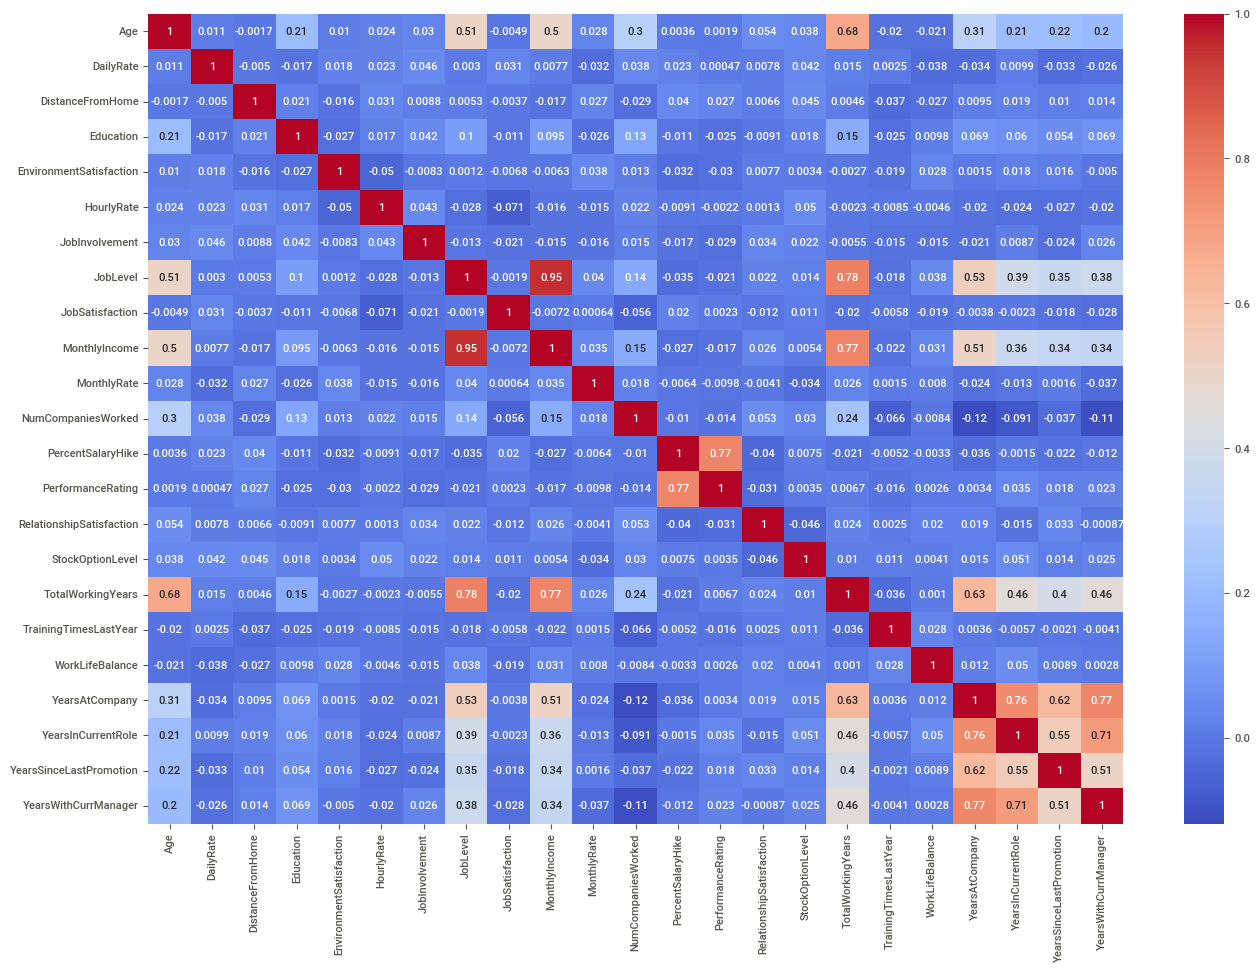

In [ ]:
#Correlation Analysis
correlation_matrix = IBM_HR.corr()
plt.figure(figsize=(14,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', annot_kws={"size":8})
plt.show()

We can see that JobLevel and MonthlyIncome are highly Correlated with eachother.

In [ ]:
IBM_HR.drop(columns=['JobLevel'],axis = 1, inplace= True) # since monthly income and joblevel are highly correlated

*JobLevel has a slightly high correlation with other attributes when compared to MonthlyIncome. So we are dropped JobLevel.*

***Variance Threshold***

In [ ]:
#Variance Threshold
from sklearn.feature_selection import VarianceThreshold
feature_variances = IBM_HR.var()
print(feature_variances)

Age                         8.345505e+01
DailyRate                   1.628196e+05
DistanceFromHome            6.572125e+01
Education                   1.048914e+00
EnvironmentSatisfaction     1.194829e+00
HourlyRate                  4.132856e+02
JobInvolvement              5.063193e-01
JobSatisfaction             1.216270e+00
MonthlyIncome               2.216486e+07
MonthlyRate                 5.066288e+07
NumCompaniesWorked          6.240049e+00
PercentSalaryHike           1.339514e+01
PerformanceRating           1.301936e-01
RelationshipSatisfaction    1.169013e+00
StockOptionLevel            7.260346e-01
TotalWorkingYears           6.054056e+01
TrainingTimesLastYear       1.662219e+00
WorkLifeBalance             4.991081e-01
YearsAtCompany              3.753431e+01
YearsInCurrentRole          1.312712e+01
YearsSinceLastPromotion     1.038406e+01
YearsWithCurrManager        1.273160e+01
dtype: float64


In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numerical_features)
selector = VarianceThreshold(threshold=0.05)
selector.fit_transform(X_scaled)
selector.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [ ]:
p = categorical_features
for col in p.columns:
  l = LabelEncoder()
  p[col] = l.fit_transform(p[col])
q = IBM_HR['Attrition']
chi_scores = chi2(p,q)
chi_scores

(array([2.20269350e-06, 1.32929732e+00, 8.34911631e-01, 5.10086544e-01,
        9.00444847e+00, 1.87456575e+01, 6.38450667e+01]),
 array([9.98815822e-01, 2.48930264e-01, 3.60856114e-01, 4.75101394e-01,
        2.69323253e-03, 1.49363092e-05, 1.34598985e-15]))

***CHI-SQUARE TEST***

<Axes: >

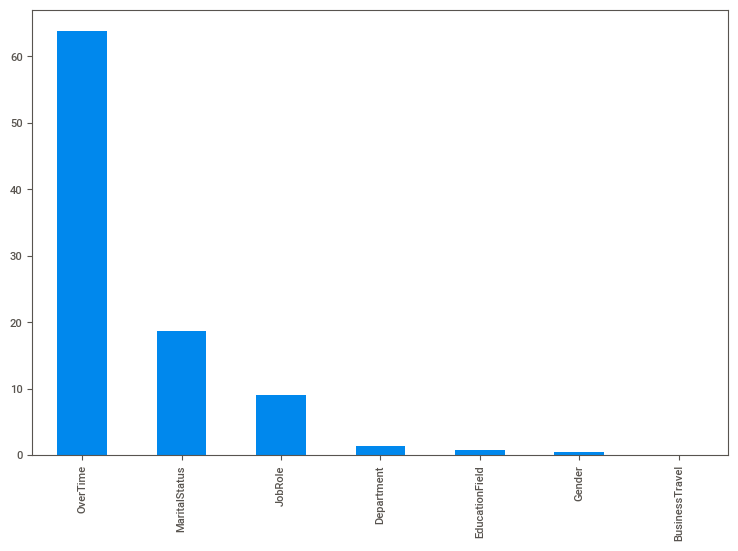

In [ ]:
#Higher the chi value, higher the importance
chi_values = pd.Series(chi_scores[0], index=p.columns)
chi_values.sort_values(ascending=False, inplace=True)
chi_values.plot.bar()

<Axes: >

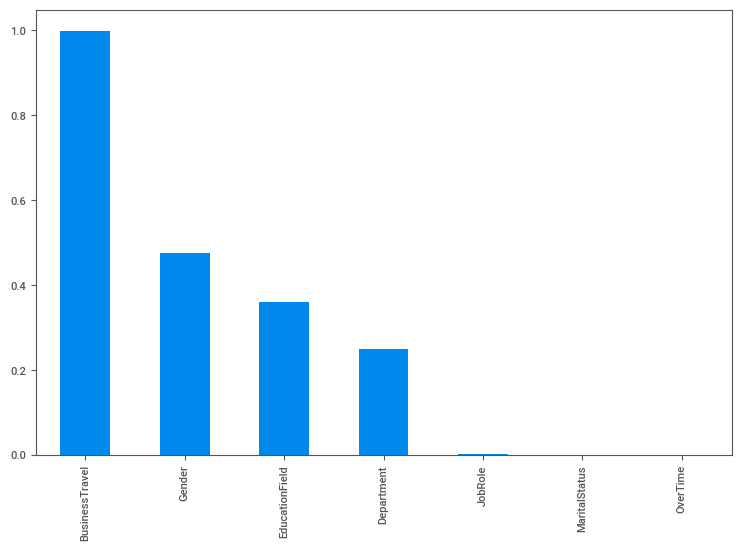

In [ ]:
#If the p value > 0.5, lower the importance
p_values = pd.Series(chi_scores[1], index=p.columns)
p_values.sort_values(ascending=False, inplace=True)
p_values.plot.bar()

*Since the p-value of BusinessTravel is greater than 0.5, We are dropping BusinessTravel.*  

In [ ]:
IBM_HR.drop(columns=['BusinessTravel'], axis=1, inplace=True)

# **MODEL CREATION AND EVALUATION**

---

# *Encoding Categorical Data and scaling Numerical Features*

In [ ]:
X = IBM_HR.drop(['Attrition'], axis=1)  # Features

# Encode categorical variables using Label Encoding
label_encoder = LabelEncoder()
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])
y = label_encoder.fit_transform(IBM_HR['Attrition'])
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# *Training the models and calculating their respective Accuracies*

In [ ]:
# Initialize and train Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train_scaled, y_train)
y_pred_logreg = logreg.predict(X_test_scaled)
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
print("Logistic Regression Accuracy:", accuracy_logreg)

# Initialize and train Random Forest model
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest Accuracy:", accuracy_rf)

# Initialize and train Naive Bayes model
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)

# Initialize and train Gradient Boosting model
gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred_gb = gb_classifier.predict(X_test)
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print("Gradient Boosting Accuracy:", accuracy_gb)

# Initialize and train Bagging classifier with Decision Trees
bagging_classifier = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42)
bagging_classifier.fit(X_train, y_train)
y_pred_bagging = bagging_classifier.predict(X_test)
accuracy_bagging = accuracy_score(y_test, y_pred_bagging)
print("Bagging Accuracy:", accuracy_bagging)

# Initialize and train AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, y_train)
y_pred_adaboost = adaboost_classifier.predict(X_test)
accuracy_adaboost = accuracy_score(y_test, y_pred_adaboost)
print("AdaBoost Accuracy:", accuracy_adaboost)

Logistic Regression Accuracy: 0.8979591836734694
Random Forest Accuracy: 0.8843537414965986
Naive Bayes Accuracy: 0.8401360544217688
Gradient Boosting Accuracy: 0.8707482993197279
Bagging Accuracy: 0.8503401360544217
AdaBoost Accuracy: 0.8775510204081632


# *Performing L1 Regularization with Logistic Regression*

Logistic Regression with L1 Regularization Accuracy: 0.8945578231292517
AUC value with L1 Regularization: 0.77


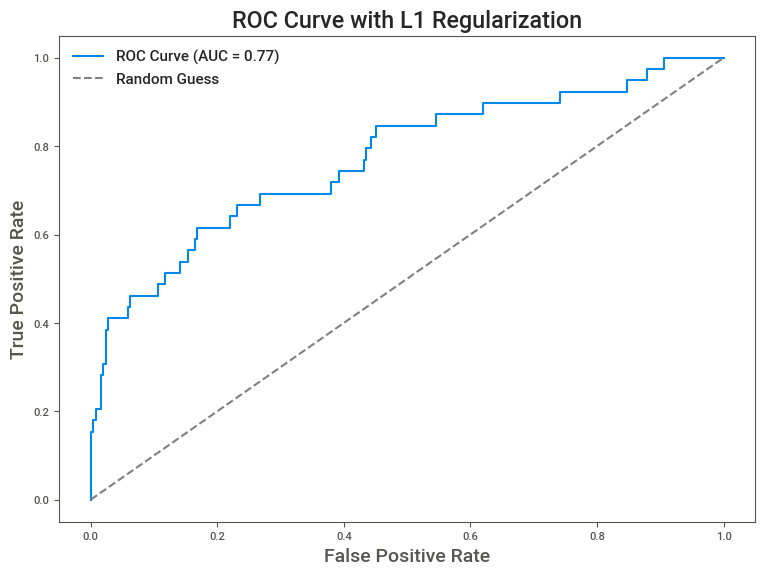

In [ ]:
# Apply L1 regularization with Logistic Regression
model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
accuracy_l1_logreg = accuracy_score(y_test, y_pred)
print("Logistic Regression with L1 Regularization Accuracy:", accuracy_l1_logreg)

# Calculate AUC value
y_prob = model.predict_proba(X_test_scaled)[:, 1]
auc_value = roc_auc_score(y_test, y_prob)
print(f'AUC value with L1 Regularization: {auc_value:.2f}')

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_value:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with L1 Regularization')
plt.legend()
plt.show()

# ***K-fold Cross-Validation***
Here we took k value as 5 and calculated Mean Accuracy and Standard Deviation of the models.

In [ ]:
# Define the number of folds for cross-validation
n_folds = 5
kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)

# Initialize models
models = [
    LogisticRegression(penalty='l1', solver='liblinear', random_state=42),
    RandomForestClassifier(),
    GaussianNB(),
    GradientBoostingClassifier(),
    BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=10, random_state=42),
    AdaBoostClassifier(n_estimators=50, random_state=42)
]
# Lists to store mean accuracies and standard deviations
mean_accuracies = []
std_accuracies = []

# Evaluate models using k-fold cross-validation
for model in models:
    model_name = model.__class__.__name__
    accuracy_scores = cross_val_score(model, X_scaled, y, cv=kf, scoring='accuracy')
    mean_accuracy = accuracy_scores.mean()
    std_accuracy = accuracy_scores.std()

    mean_accuracies.append(mean_accuracy)
    std_accuracies.append(std_accuracy)

    print(f'{model_name} - Mean Accuracy: {mean_accuracy:.2%}, Standard Deviation: {std_accuracy:.4f}')

LogisticRegression - Mean Accuracy: 85.31%, Standard Deviation: 0.0250
RandomForestClassifier - Mean Accuracy: 84.76%, Standard Deviation: 0.0184
GaussianNB - Mean Accuracy: 75.37%, Standard Deviation: 0.0340
GradientBoostingClassifier - Mean Accuracy: 84.56%, Standard Deviation: 0.0200
BaggingClassifier - Mean Accuracy: 83.95%, Standard Deviation: 0.0167
AdaBoostClassifier - Mean Accuracy: 84.76%, Standard Deviation: 0.0156


# ***Model Comparison using ROC Curve***
We plotted ROC curves for each model and calculated their AUC scores.
Visually represented all of these through the graph.

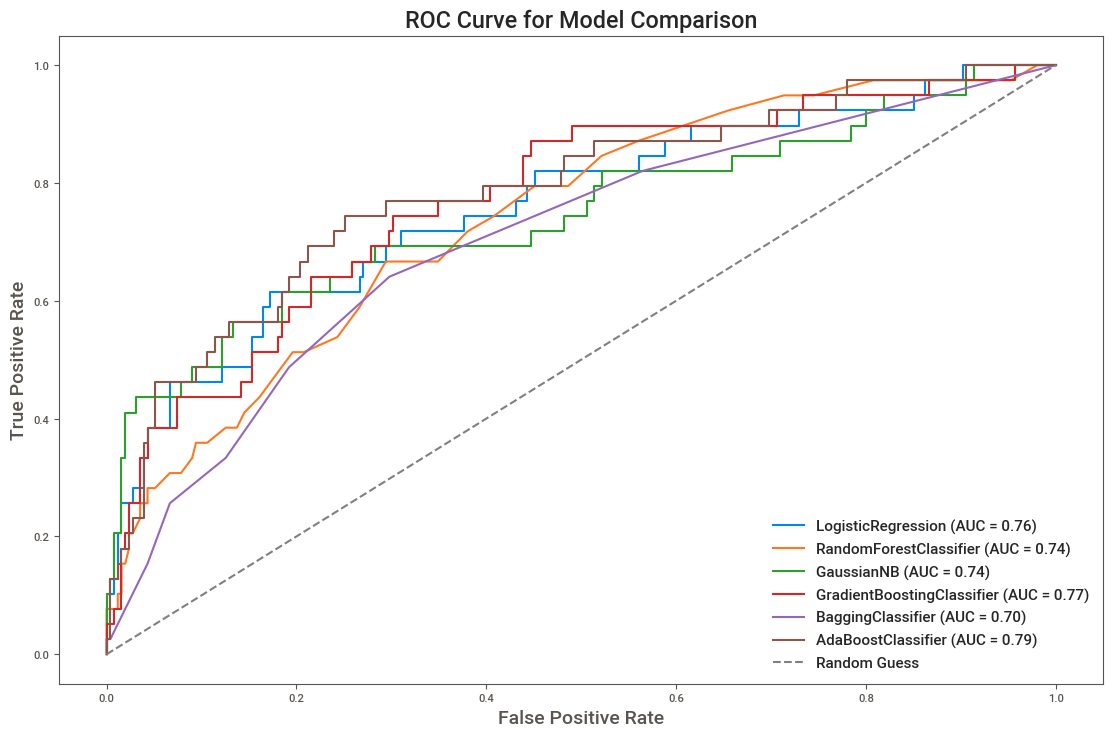

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
# Plot ROC curves for each model

plt.figure(figsize=(12, 8))

for model in models:
    model.fit(X_train, y_train)

    try:
        y_prob = model.predict_proba(X_test)[:, 1]
    except AttributeError:
        # For models without predict_proba, use decision_function
        y_prob = model.decision_function(X_test)

    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model.__class__.__name__} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Model Comparison')
plt.legend()
plt.show()

# **Model Accuracy Comparision through Horizontal Bar Plot**

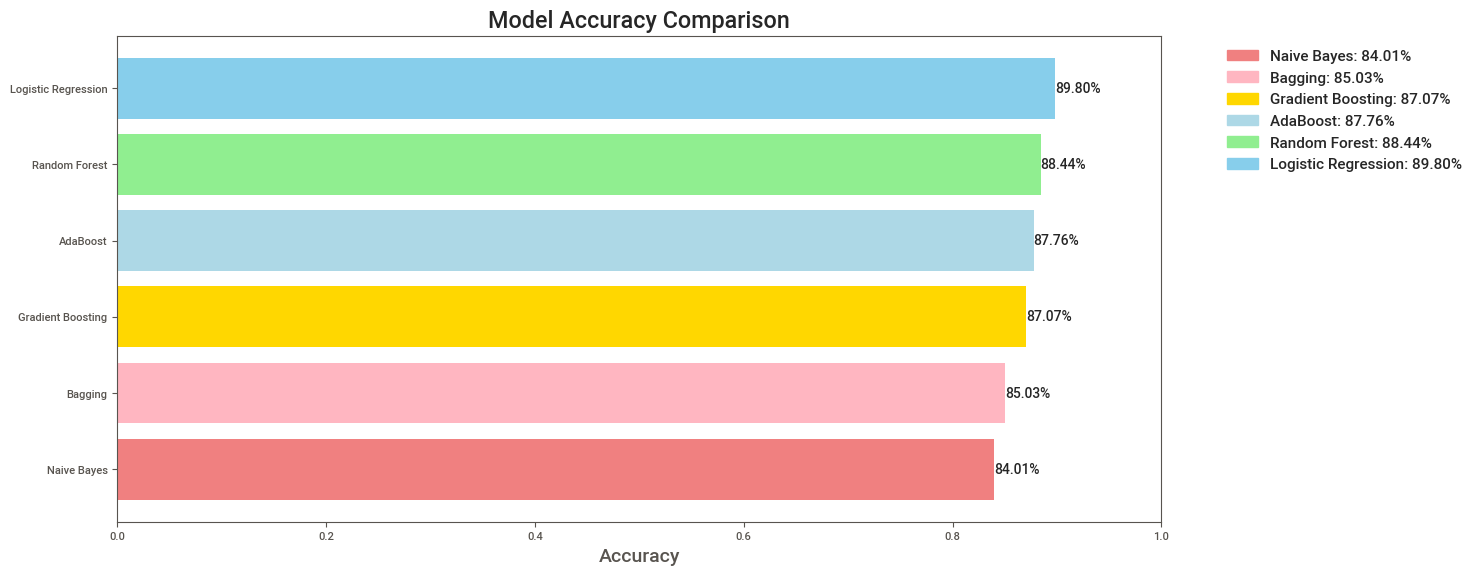

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Patch
from matplotlib.colors import to_rgba

# List of model names
models = ['Logistic Regression', 'Random Forest','Naive Bayes', 'Gradient Boosting', 'Bagging', 'AdaBoost']

# List of corresponding accuracies
accuracies = [accuracy_logreg, accuracy_rf, accuracy_nb, accuracy_gb, accuracy_bagging, accuracy_adaboost]

# Create custom colors for each bar
custom_colors = ['skyblue', 'lightgreen', 'lightcoral', 'gold', 'lightpink',
                 'lightblue', 'mediumseagreen', 'lightsalmon', 'cornflowerblue', 'khaki']

# Sort models and accuracies based on accuracy
sorted_models, sorted_accuracies, sorted_colors = zip(*sorted(zip(models, accuracies, custom_colors), key=lambda x: x[1]))

# Create a bar plot
plt.figure(figsize=(12, 6))
bars = plt.barh(sorted_models, sorted_accuracies, color=sorted_colors)
plt.xlabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.xlim(0, 1)  # Set x-axis limit to represent percentages

# Display the percentage values on the bars
for bar, value in zip(bars, sorted_accuracies):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{value:.2%}', va='center', fontsize=10)

# Create color boxes with percentage labels
legend_elements = [Patch(color=to_rgba(color), label=f'{model}: {accuracy:.2%}') for model, color, accuracy in zip(sorted_models, sorted_colors, sorted_accuracies)]
plt.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()
